In [1]:
import pylab
import numpy as np
import random


In [2]:
x_val=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
y_val=[0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562]

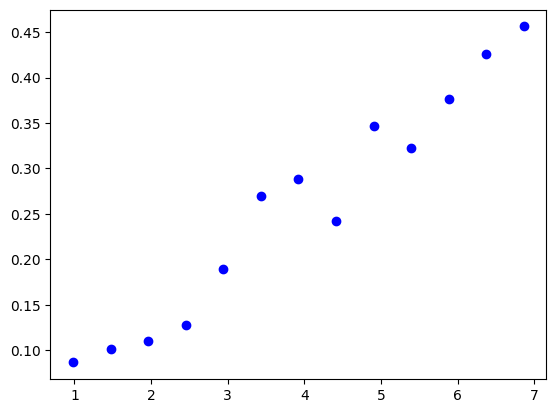

In [3]:
x_vals=pylab.array(x_val)*9.81
y_vals=pylab.array(y_val)
pylab.plot(x_vals,y_vals,"bo")
pylab.show()

In [4]:
pylab.polyfit(x_vals,y_vals,1)

array([0.06471082, 0.00333626])

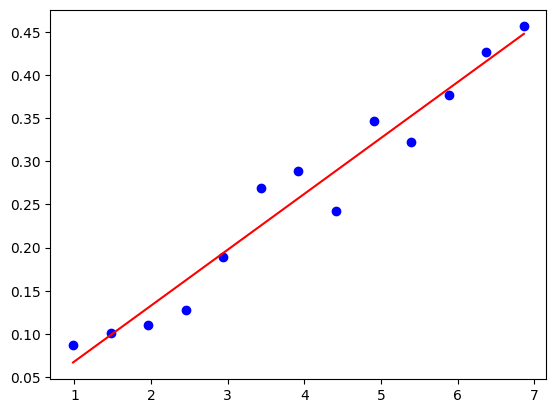

Slope: 0.06471082434385186
Intercept: 0.003336263736263802


In [5]:

slope, intercept = np.polyfit(x_vals, y_vals, 1)

predicted_y_vals = slope * x_vals + intercept

pylab.plot(x_vals, y_vals, "bo", label="Original Data")
pylab.plot(x_vals, predicted_y_vals, "r-", label="Linear Regression")
pylab.show()

print("Slope:", slope)
print("Intercept:", intercept)


In [7]:
def r_squared(y_vals, predicted_y_vals):
  residuals = y_vals - predicted_y_vals
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y_vals - np.mean(y_vals))**2)
  r_squared = 1 - (ss_res / ss_tot)
  return r_squared



In [8]:
def genfits(x_vals,y_vals,degres):
  models=[]
  for d in degres:
    models.append(np.polyfit(x_vals,y_vals,d))
  return models

In [9]:
def testfit(models,degres,x_vals,y_vals,title):
  pylab.plot(x_vals,y_vals,"o",label="Original Data")
  for i in range(len(models)):
    est_val=np.polyval(models[i],x_vals)
    error=r_squared(y_vals,est_val)
    pylab.plot(x_vals,est_val,label="Fit of Degree"+str(degres[i])+"R^2="+str(round(error,5)))
    pylab.title(title)
    pylab.legend(loc="best")
  pylab.show()

C:\Users\ABDO\AppData\Local\Temp\ipykernel_2488\3900441449.py:4: RankWarning: Polyfit may be poorly conditioned
  models.append(np.polyfit(x_vals,y_vals,d))


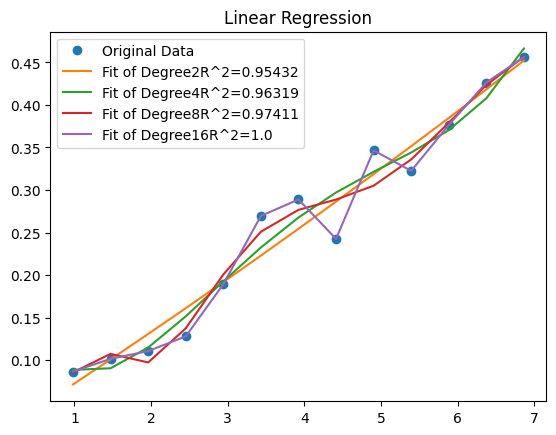

In [10]:
testfit(genfits(x_vals,y_vals,[2,4,8,16]),[2,4,8,16],x_vals,y_vals,"Linear Regression")

In [11]:
def gennoisy(a,b,c,x_vals,fname):
  y_vals=[]
  f=open(fname,"a")
  f.write("x  y\n")
  for x in x_vals:
    y=(a*x**2+b*x+c)+random.gauss(0,35)
    y_vals.append(y)
    for i in range(len(y_vals)):
      f.write(str(x_vals[i])+"  "+str(y_vals[i])+"\n")
  f.close()
  return

In [12]:
# prompt: generate noisy data with xvals range -10,11,1

import random

def gennoisy(a, b, c, x_vals, fname):
  y_vals = []
  f = open(fname, "a")  # Use "w" to overwrite the file
  f.write("x  y\n")
  for x in x_vals:
    y = (a * x**2 + b * x + c) + random.gauss(0, 35)
    y_vals.append(y)
  for i in range(len(y_vals)):
    f.write(str(x_vals[i]) + "  " + str(y_vals[i]) + "\n")
  f.close()
  return

x_vals = list(range(-10, 11, 1))  # Create a list of x-values
gennoisy(1, 2, 3, x_vals, "noisy_data.txt")  # Generate and save noisy data



In [13]:
def split_noisy_data(filename, split_ratio=0.5):
  with open(filename, "r") as f:
    lines = f.readlines()[1:]  # Skip the header line
  data = []
  for line in lines:
    x, y = line.strip().split("  ")
    data.append((float(x), float(y)))
  random.shuffle(data)
  split_index = int(len(data) * split_ratio)
  return data[:split_index], data[split_index:]

filename = "noisy_data.txt"
part1, part2 = split_noisy_data(filename)

print("First part of data (50%):")
for x, y in part1:
  print(f"x: {x}, y: {y}")

print("\nSecond part of data (50%):")
for x, y in part2:
  print(f"x: {x}, y: {y}")


First part of data (50%):
x: 4.0, y: 31.01534832251107
x: -7.0, y: 7.977949679302867
x: 0.0, y: -55.03112333578205
x: -10.0, y: 44.54714745730979
x: -1.0, y: 75.40220149137554
x: 5.0, y: 24.28775205128151
x: -8.0, y: 29.87830976992408
x: 8.0, y: 88.14163985371968
x: 3.0, y: 18.967601864319466
x: 2.0, y: -0.3118031687264846

Second part of data (50%):
x: -4.0, y: 25.013959944325535
x: -5.0, y: -36.68733587841009
x: -9.0, y: 115.81028197427968
x: 1.0, y: 59.41699201500757
x: 10.0, y: 135.0987576258328
x: 6.0, y: 28.393348266907257
x: -6.0, y: 44.52044109707042
x: 9.0, y: 94.3353347826726
x: -3.0, y: -60.61891907476094
x: 7.0, y: 22.511032947148706
x: -2.0, y: 46.64651308783147


In [14]:
# prompt: sve xvlas and y vals from part 1 and 2

x_vals_part1 = [x for x, _ in part1]
y_vals_part1 = [y for _, y in part1]

x_vals_part2 = [x for x, _ in part2]
y_vals_part2 = [y for _, y in part2]

print("x_vals_part1:", x_vals_part1)
print("y_vals_part1:", y_vals_part1)
print("x_vals_part2:", x_vals_part2)
print("y_vals_part2:", y_vals_part2)


x_vals_part1: [4.0, -7.0, 0.0, -10.0, -1.0, 5.0, -8.0, 8.0, 3.0, 2.0]
y_vals_part1: [31.01534832251107, 7.977949679302867, -55.03112333578205, 44.54714745730979, 75.40220149137554, 24.28775205128151, 29.87830976992408, 88.14163985371968, 18.967601864319466, -0.3118031687264846]
x_vals_part2: [-4.0, -5.0, -9.0, 1.0, 10.0, 6.0, -6.0, 9.0, -3.0, 7.0, -2.0]
y_vals_part2: [25.013959944325535, -36.68733587841009, 115.81028197427968, 59.41699201500757, 135.0987576258328, 28.393348266907257, 44.52044109707042, 94.3353347826726, -60.61891907476094, 22.511032947148706, 46.64651308783147]


C:\Users\ABDO\AppData\Local\Temp\ipykernel_2488\3900441449.py:4: RankWarning: Polyfit may be poorly conditioned
  models.append(np.polyfit(x_vals,y_vals,d))


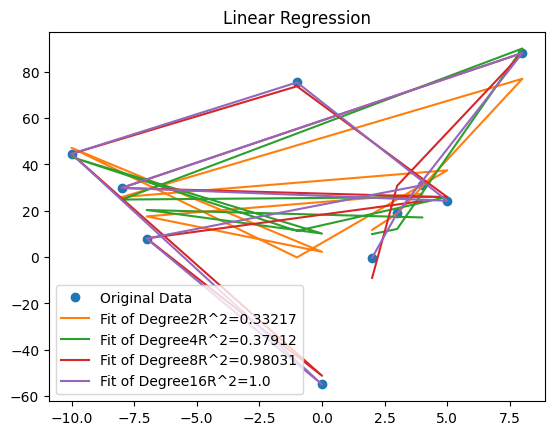

In [15]:
testfit(genfits(x_vals_part1,y_vals_part1,[2,4,8,16]),[2,4,8,16],x_vals_part1,y_vals_part1,"Linear Regression")

C:\Users\ABDO\AppData\Local\Temp\ipykernel_2488\3900441449.py:4: RankWarning: Polyfit may be poorly conditioned
  models.append(np.polyfit(x_vals,y_vals,d))


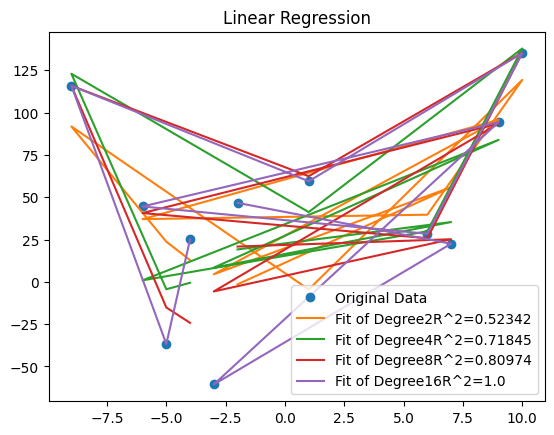

In [16]:
testfit(genfits(x_vals_part2,y_vals_part2,[2,4,8,16]),[2,4,8,16],x_vals_part2,y_vals_part2,"Linear Regression")